## Setup

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
from scipy.interpolate import interp1d
import sys
import math
import seaborn as sns
import inspect
from scipy import stats
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec


from matplotlib.colors import LogNorm
import statsmodels
import statsmodels.api as sm
from matplotlib.image import NonUniformImage
import re

In [2]:
### plotting params ###
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8.0,6.0]

### load data from theory run
data = pd.read_csv("../theory/old_files/results/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("../theory/old_files/results/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']
w_vals = data['w'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [3]:
### functions for theory ###
def poles(w,w_vals,pole_vals):
    f=interp1d(w_vals,pole_vals,fill_value="extrapolate")
    return(f(w))

def residues(w,w_vals, res_vals):
    res_vals=[-1*x for x in res_vals]
    f = interp1d(w_vals,res_vals,fill_value="extrapolate")
    return (f(w))

def get_gammae(w,s,w_vals,pole_vals,N=10000,sigma=1,d=1):
    l_c=np.sqrt(sigma/s)
    return(s*N*(l_c**d)*poles(w/l_c,w_vals,pole_vals))

def get_thetae(w,s,w_vals,res_vals,mu=1e-8,N=10000,sigma=1,d=1):
    l_c = np.sqrt(sigma / s)
    return(mu*N*(l_c**d)*residues(w/l_c,w_vals,res_vals))

def finite_sfs_k(n,k,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,sigma=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,sigma,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,sigma,d)
    logval = k*np.log(n)+thetae*np.log(gammae)-(k+thetae)*np.log(n+gammae)+loggamma(k+thetae)-loggamma(k+1)-loggamma(thetae)
    return(np.e**logval)

In [4]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]

In [5]:
### read in data
df = pd.read_csv('sfs_summaries/compiled_spatial_W30_K5_sfs.tsv',delimiter='\t')

In [6]:
df

,s,width,allele counts,se_f,f,n,f_per_kb
0,-0.20,0.000000,1.000000,0.000000,0.0000,20,0.000000
1,-0.20,0.000000,1.106339,0.949823,6.0920,20,0.000061
2,-0.20,0.000000,1.354142,0.000000,0.0000,20,0.000000
3,-0.20,0.000000,1.657450,0.000000,0.0000,20,0.000000
4,-0.20,0.000000,2.028693,1.151817,8.5925,20,0.000086
...,...,...,...,...,...,...,...
8195,-0.05,9.797959,8054.478842,0.000000,0.0000,20,0.000000
8196,-0.05,9.797959,9858.561895,0.000000,0.0000,20,0.000000
8197,-0.05,9.797959,12066.732626,0.000000,0.0000,20,0.000000
8198,-0.05,9.797959,14769.500645,0.000000,0.0000,20,0.000000


In [9]:
s_list_sim = df['s'].unique() # 5 should be -1e-5
s_list_sim

array([-0.2 , -0.15, -0.1 , -0.05])

In [25]:
w_list_sim = df['width'].unique()
w_plot = [w_list_sim[10],w_list_sim[28],w_list_sim[2]]
w_plot

[2.449489742783178, 4.898979485566356, 11.0227038425243]

In [18]:
# w_list_sim

array([ 0.        ,  1.22474487, 11.02270384, 12.24744871, 13.47219359,
       14.69693846, 15.92168333, 17.1464282 , 18.37117307, 19.59591794,
        2.44948974, 20.82066281, 22.04540769, 23.27015256, 24.49489743,
       25.7196423 , 26.94438717, 28.16913204, 29.39387691,  3.67423461,
       30.61862178, 31.84336666, 33.06811153, 34.2928564 , 35.51760127,
       36.74234614, 37.96709101, 39.19183588,  4.89897949, 40.41658076,
       41.64132563, 42.8660705 , 44.09081537, 45.31556024, 46.54030511,
       47.76504998, 48.98979486,  6.12372436,  7.34846923,  8.5732141 ,
        9.79795897])

## Simulations - hold width, change s

<ipython-input-28-e5cb4ed63d0f>:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[i].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[j], label=str(s_list_sim[j]), marker='o',linestyle='dashed')


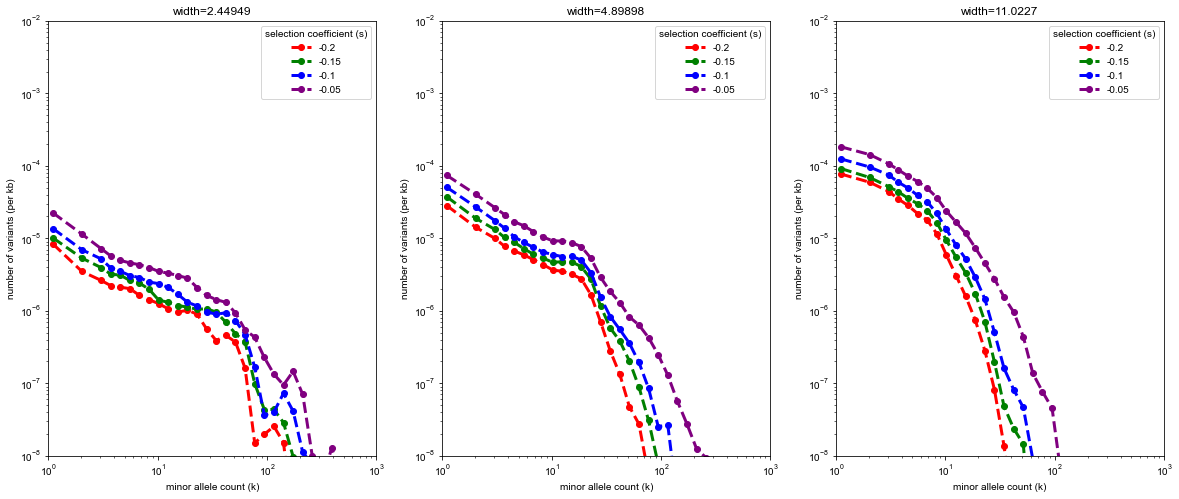

In [28]:
fig, axs = plt.subplots(1,len(w_plot),figsize=(20,8))
colors = ['red','green','blue','purple','orange']
x = np.logspace(0,3,100)
y = 10**(-1*np.log10(x)) * 1e-2
for i in range(len(w_plot)):
    for j in range(len(s_list_sim)):
        sfs_data = df[df['s']==s_list_sim[j]]
        sfs_temp = sfs_data[sfs_data['width'] == w_plot[i]]
        sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
        axs[i].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[j], label=str(s_list_sim[j]), marker='o',linestyle='dashed')
      
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_ylim(1e-8, 1e-2)
    axs[i].set_xlim(1e0,1e3)
    axs[i].set_xlabel("minor allele count (k)")
    axs[i].set_ylabel("number of variants (per kb)")
    axs[i].set_title("width="+str(round(w_plot[i],5)))
    axs[i].legend(title="selection coefficient (s)")

*Note* for larger widths (greater than habitat width) we are re-sampling the same mutation - get bumps in doubletons, etc. so leaving them out

## Simulations - hold s, change w

<ipython-input-63-e319f4d65dd8>:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


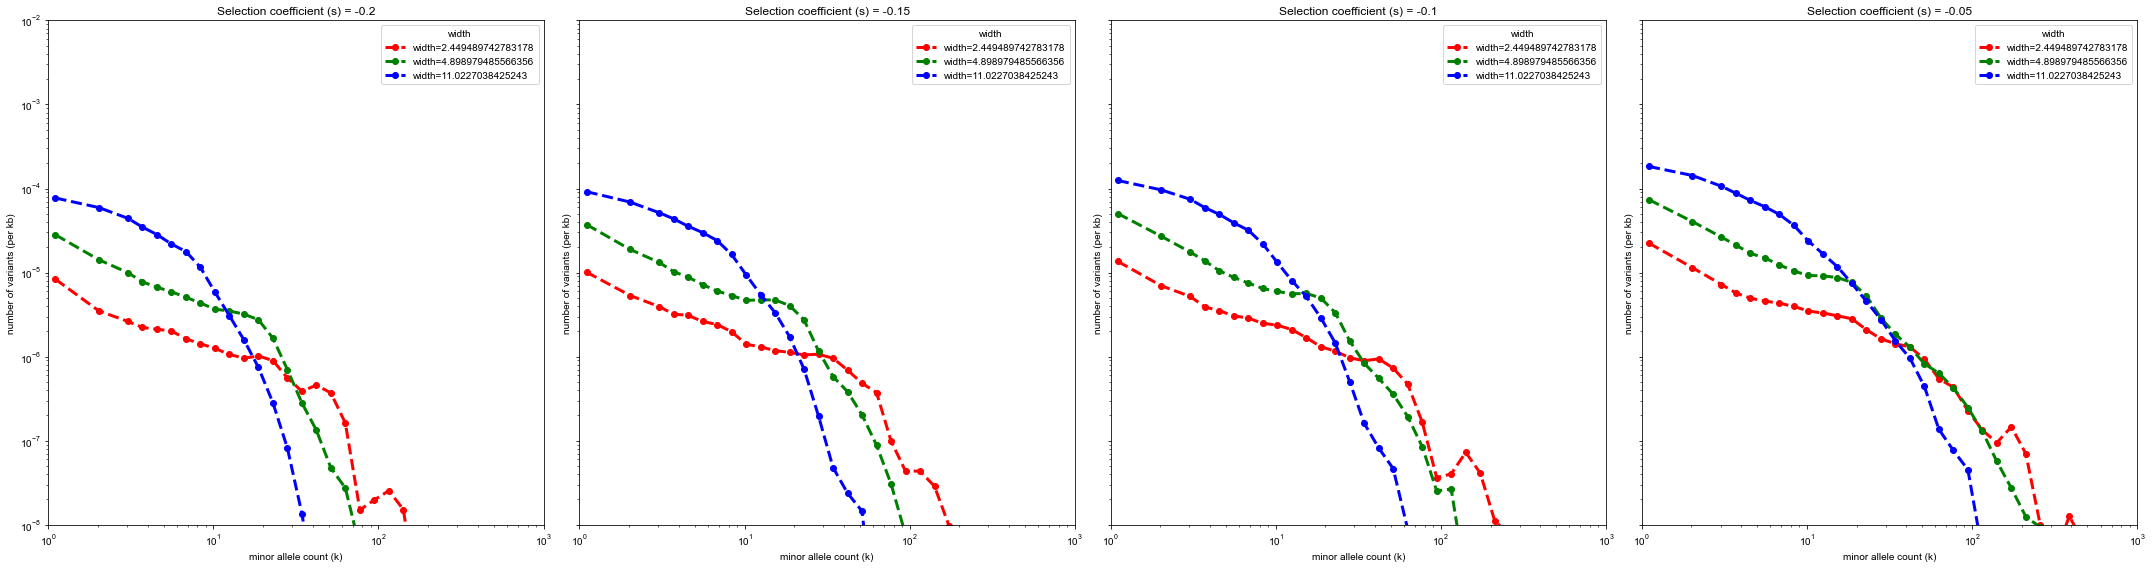

In [63]:
fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']
x = np.logspace(0, 3, 100)

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        sfs_data = df[df['s'] == s_coefficient]
        sfs_temp = sfs_data[sfs_data['width'] == width]
        sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
        axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        
    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-8, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")

# Adjust layout
plt.tight_layout()
plt.show()


## Compare to theory - no adjustment

<ipython-input-64-ce412899296e>:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


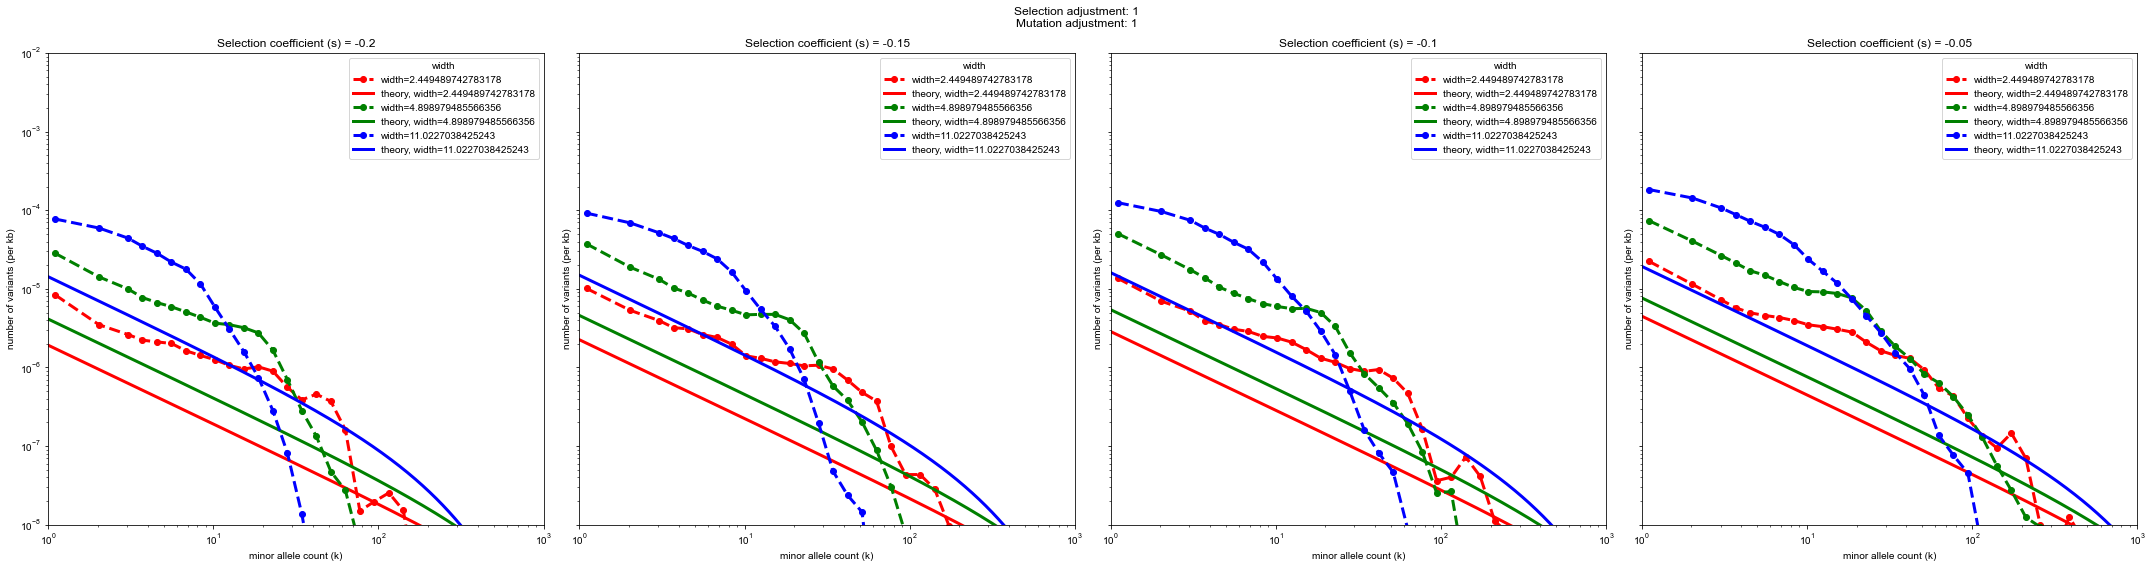

In [64]:
fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']

adj_factor_mu=1
adj_factor_s=1
mu = 1e-10
n = 10000
kmax = 1000
step = 1
K=5/(4.08**2)
sigma=0.2*4.08

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        sfs_data = df[df['s'] == s_coefficient]
        sfs_temp = sfs_data[sfs_data['width'] == width]
        sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
        axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        
        sfs_th = [finite_sfs_k(n,k,width*4.08,-1*s_coefficient*adj_factor_s,w_vals,pole_vals,res_vals,mu*adj_factor_mu,K,sigma,d=2)*1e3 for k in range(0, kmax, step)]
        axs[j].plot(range(0, kmax, step), sfs_th, label=f"theory, width={width}", marker='none', color=colors[i])

        
    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-8, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")

fig.suptitle(f"Selection adjustment: {adj_factor_s}\nMutation adjustment: {adj_factor_mu}")
# Adjust layout
plt.tight_layout()
plt.show()


## Compare to theory - adjust mu and s

<ipython-input-65-9a7ee8f364a6>:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


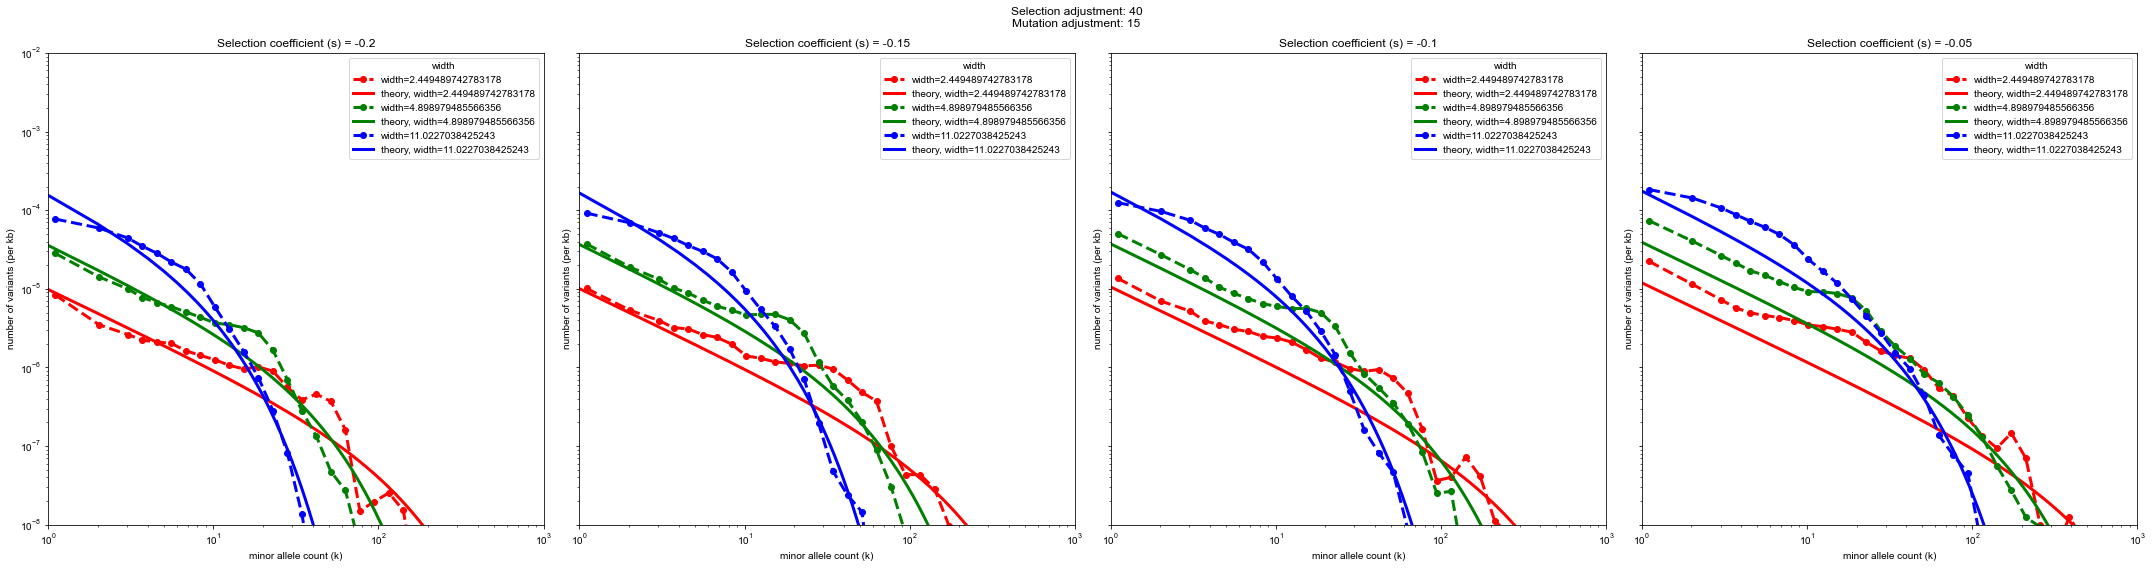

In [65]:
fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']

adj_factor_mu=15
adj_factor_s=40
mu = 1e-10
n = 10000
kmax = 1000
step = 1
K=5/(4.08**2)
sigma=0.2*4.08

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        sfs_data = df[df['s'] == s_coefficient]
        sfs_temp = sfs_data[sfs_data['width'] == width]
        sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
        axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        
        sfs_th = [finite_sfs_k(n,k,width*4.08,-1*s_coefficient*adj_factor_s,w_vals,pole_vals,res_vals,mu*adj_factor_mu,K,sigma,d=2)*1e3 for k in range(0, kmax, step)]
        axs[j].plot(range(0, kmax, step), sfs_th, label=f"theory, width={width}", marker='none', color=colors[i])

        
    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-8, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")

fig.suptitle(f"Selection adjustment: {adj_factor_s}\nMutation adjustment: {adj_factor_mu}")
# Adjust layout
plt.tight_layout()
plt.show()
